In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df=pd.read_csv('Bank_churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7412,7413,15631693,Hill,697,France,Male,36,7,0.00,2,1,1,74760.32,0
2318,2319,15648005,Russell,672,Spain,Male,33,2,0.00,2,1,1,182738.00,0
4183,4184,15625592,Sal,486,France,Male,26,2,0.00,2,1,1,31399.40,0
702,703,15603436,Savage,594,Spain,Female,49,2,126615.94,2,0,1,123214.74,0
9124,9125,15753639,Gibson,608,France,Male,37,5,146093.39,2,0,0,160593.41,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Dropping Row Number and Customer Id and Surname as they are not useful

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [18]:
df1['Gender'].replace({'Male':0, 'Female':1},inplace=True)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [19]:
columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [20]:
from sklearn import preprocessing
scale=preprocessing.MinMaxScaler()

df1[columns]=scale.fit_transform(df1[columns])

In [29]:
for col in df1:
    print(df1[col].unique())

[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.434 0.688 0.39

In [32]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [36]:
x=df1.drop(['Exited'], axis='columns')
y=df['Exited']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [40]:
x.columns.shape

(12,)

In [69]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 828us/step - loss: 0.5258 - accuracy: 0.7960
Epoch 2/50
250/250 [==============================] - 0s 787us/step - loss: 0.4789 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 0s 999us/step - loss: 0.4665 - accuracy: 0.7960
Epoch 4/50
250/250 [==============================] - 0s 871us/step - loss: 0.4573 - accuracy: 0.7960
Epoch 5/50
250/250 [==============================] - 0s 789us/step - loss: 0.4489 - accuracy: 0.7960
Epoch 6/50
250/250 [==============================] - 0s 879us/step - loss: 0.4423 - accuracy: 0.7960
Epoch 7/50
250/250 [==============================] - 0s 799us/step - loss: 0.4377 - accuracy: 0.8026
Epoch 8/50
250/250 [==============================] - 0s 794us/step - loss: 0.4329 - accuracy: 0.8099
Epoch 9/50
250/250 [==============================] - 0s 816us/step - loss: 0.4304 - accuracy: 0.8170
Epoch 10/50
250/250 [==============================] - 0s 797us/step - loss: 0.427

In [70]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 740us/step - loss: 0.3609 - accuracy: 0.8500


[0.3609093725681305, 0.8500000238418579]

In [71]:
yp=model.predict(x_test)
yp[:5]

array([[0.07080677],
       [0.06928211],
       [0.08514327],
       [0.0950588 ],
       [0.09123281]], dtype=float32)

In [75]:
yp_s=[]
for i in yp:
    if(i>=0.5):
        yp_s.append(1)
    else:
        yp_s.append(0)
yp_s[:5]        
        

[0, 0, 0, 0, 0]

In [76]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [77]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp_s))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Y_Truth')

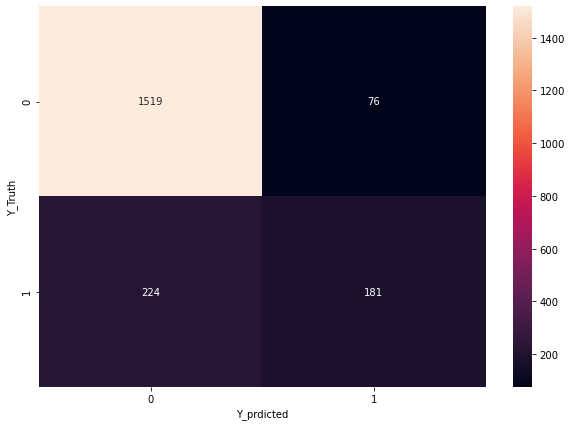

In [79]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp_s)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Y_prdicted')
plt.ylabel('Y_Truth')